In [63]:
import pandas as pd
import sklearn.metrics as m
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('ticdata2000.txt', sep="\t", header=None)#, names=columns)

In [15]:
# This dataset does not have attribute names, they are placed in separed file
columns = ['Customer Subtype',

'Number of houses',

'Avg size household',

'Avg age',

'Customer main type',

'Roman catholic',

'Protestant ...',

'Other religion',

'No religion',

'Married',

'Living together',

'Other relation',

'Singles',

'Household without children',

'Household with children',

'High level education',

'Medium level education',

'Lower level education',

'High status',

'Entrepreneur',

'Farmer',

'Middle management',

'Skilled labourers',

'Unskilled labourers',

'Social class A',

'Social class B1',

'Social class B2',

'Social class C',

'Social class D',

'Rented house',

'Home owners',

'1 car',

'2 cars',

'No car',

'National Health Service',

'Private health insurance',

'Income < 30.000',

'Income 30-45.000',

'Income 45-75.000',

'Income 75-122.000',

'Income >123.000',

'Average income',

'Purchasing power class',

'Contribution private third party insurance see L4',

'Contribution third party insurance (firms) ...',
'Contribution third party insurane (agriculture)',

'Contribution car policies',

'Contribution delivery van policies',

'Contribution motorcycle/scooter policies',

'Contribution lorry policies',

'Contribution trailer policies',

'Contribution tractor policies',

'Contribution agricultural machines policies ',

'Contribution moped policies',

'Contribution life insurances',

'Contribution private accident insurance policies',

'Contribution family accidents insurance policies',

'Contribution disability insurance policies',

'Contribution fire policies',

'Contribution surfboard policies',

'Contribution boat policies',

'Contribution bicycle policies',

'Contribution property insurance policies',

'Contribution social security insurance policies',

'Number of private third party insurance 1 - 12',

'Number of third party insurance (firms) ...',

'Number of third party insurane (agriculture)',

'Number of car policies',

'Number of delivery van policies',

'Number of motorcycle/scooter policies',

'Number of lorry policies',

'Number of trailer policies',

'Number of tractor policies',

'Number of agricultural machines policies',

'Number of moped policies',

'Number of life insurances',

'Number of private accident insurance policies',

'Number of family accidents insurance policies',

'Number of disability insurance policies',

'Number of fire policies',

'Number of surfboard policies',

'Number of boat policies',

'Number of bicycle policies',

'Number of property insurance policies',

'Number of social security insurance policies',

'Number of mobile home policies 0 - 1']

In [16]:
columns = [i.replace(' ','_') for i in columns]

In [17]:
data.columns = columns

In [436]:
dif=data.nunique()/data.shape[0]


In [19]:
# Dropping unnecessary columns
data1 = data.drop(columns = ['Contribution_private_third_party_insurance_see_L4',
       'Contribution_third_party_insurance_(firms)_...',
       'Contribution_third_party_insurane_(agriculture)',
       'Contribution_car_policies', 'Contribution_delivery_van_policies',
       'Contribution_motorcycle/scooter_policies',
       'Contribution_lorry_policies', 'Contribution_trailer_policies',
       'Contribution_tractor_policies',
       'Contribution_agricultural_machines_policies_',
       'Contribution_moped_policies', 'Contribution_life_insurances',
       'Contribution_private_accident_insurance_policies',
       'Contribution_family_accidents_insurance_policies',
       'Contribution_disability_insurance_policies',
       'Contribution_fire_policies', 'Contribution_surfboard_policies',
       'Contribution_boat_policies', 'Contribution_bicycle_policies',
       'Contribution_property_insurance_policies',
       'Contribution_social_security_insurance_policies',
       'Number_of_private_third_party_insurance_1_-_12',
       'Number_of_third_party_insurance_(firms)_...',
       'Number_of_third_party_insurane_(agriculture)',
       'Number_of_car_policies', 'Number_of_delivery_van_policies',
       'Number_of_motorcycle/scooter_policies', 'Number_of_lorry_policies',
       'Number_of_trailer_policies', 'Number_of_tractor_policies',
       'Number_of_agricultural_machines_policies', 'Number_of_moped_policies',
       'Number_of_life_insurances',
       'Number_of_private_accident_insurance_policies',
       'Number_of_family_accidents_insurance_policies',
       'Number_of_disability_insurance_policies', 'Number_of_fire_policies',
       'Number_of_surfboard_policies', 'Number_of_boat_policies',
       'Number_of_bicycle_policies', 'Number_of_property_insurance_policies',
       'Number_of_social_security_insurance_policies',
       'Number_of_mobile_home_policies_0_-_1'], axis=1)


In [20]:
data1.shape

(5822, 43)

In [21]:
data1.head(10)

,Customer_Subtype,Number_of_houses,Avg_size_household,Avg_age,Customer_main_type,Roman_catholic,Protestant_...,Other_religion,No_religion,Married,...,No_car,National_Health_Service,Private_health_insurance,Income_<_30.000,Income_30-45.000,Income_45-75.000,Income_75-122.000,Income_>123.000,Average_income,Purchasing_power_class
0,33,1,3,2,8,0,5,1,3,7,...,1,8,1,0,4,5,0,0,4,3
1,37,1,2,2,8,1,4,1,4,6,...,2,6,3,2,0,5,2,0,5,4
2,37,1,2,2,8,0,4,2,4,3,...,2,9,0,4,5,0,0,0,3,4
3,9,1,3,3,3,2,3,2,4,5,...,0,7,2,1,5,3,0,0,4,4
4,40,1,4,2,10,1,4,1,4,7,...,1,5,4,0,0,9,0,0,6,3
5,23,1,2,1,5,0,5,0,5,0,...,3,9,0,5,2,3,0,0,3,3
6,39,2,3,2,9,2,2,0,5,7,...,1,9,0,4,3,3,0,0,3,5
7,33,1,2,3,8,0,7,0,2,7,...,2,6,3,2,5,3,0,0,3,3
8,33,1,2,4,8,0,1,3,6,6,...,3,7,2,7,2,1,0,0,2,3
9,11,2,3,3,3,3,5,0,2,7,...,2,6,3,2,3,3,1,0,4,7


# KMeans

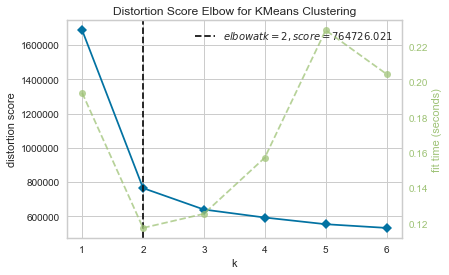

In [23]:
model = KMeans()
viz = KElbowVisualizer(model, k=(1,7)) # finding the optimal number of clusters
viz.fit(data1)
viz.poof()

In [24]:
model = KMeans(2)

In [25]:
data_clustered = model.fit(data1)

In [26]:
data1['cluster_kmeans'] = data_clustered.fit_predict(data1)

In [28]:
m.silhouette_score(data1.drop('cluster_kmeans', axis=1), data1['cluster_kmeans'])

0.47543319181000765

### Use PCA to plot the clusters

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(2)
pca = pca.fit(data1)
data1_PCA = pca.transform(data1)

In [31]:
# check explained ratio
pca.explained_variance_ratio_

array([0.62995802, 0.1021757 ])

In [32]:
df_PCA = pd.DataFrame(data1_PCA, columns=['PC1','PC2'])

In [33]:
df_PCA['label'] = data1['cluster_kmeans']

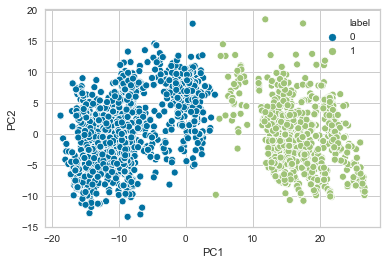

In [36]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=df_PCA['label'])

### KMEANS with PCA

In [37]:
X = df_PCA[['PC1','PC2']]

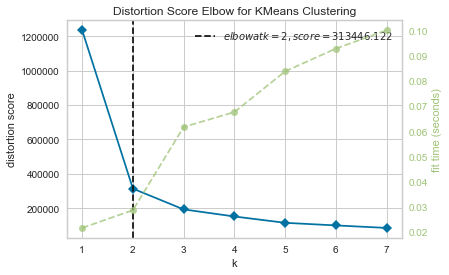

In [38]:
model = KMeans()
viz = KElbowVisualizer(model, k=(1,8))
viz.fit(X)
viz.poof()

In [39]:
model1 = KMeans(2)

In [40]:
PCA_clustered = model1.fit(X)

In [41]:
df_PCA['cluster_PCA'] = PCA_clustered.fit_predict(X)

In [42]:
df_PCA.label.value_counts()

0    3827
1    1995
Name: label, dtype: int64

In [43]:
df_PCA['cluster_PCA'].value_counts()

0    3827
1    1995
Name: cluster_PCA, dtype: int64

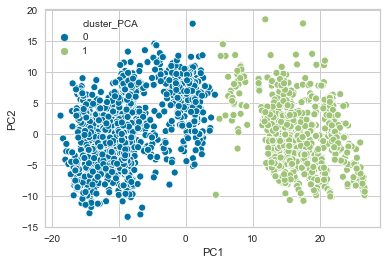

In [44]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=df_PCA['cluster_PCA'])

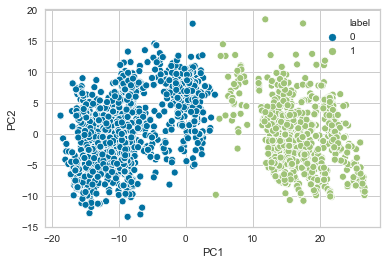

In [45]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=df_PCA['label'])

In [46]:
# rotating the clusters chart
from sklearn.manifold import TSNE

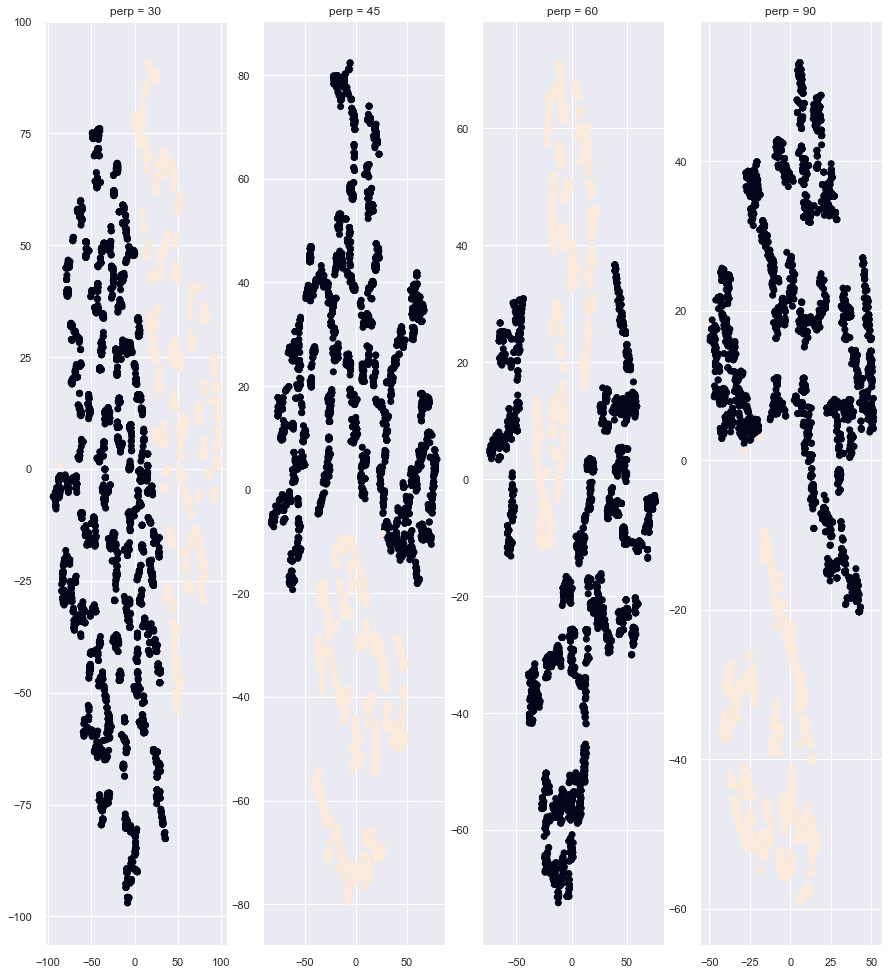

In [49]:
fig, ax = plt.subplots(1,4, figsize=(15,17))
sns.set(palette='hls')
for i, perp in enumerate([30,45,60,90]):
    tsne = TSNE(perplexity=perp)
    new_x = tsne.fit_transform(X)
    ax[i].scatter(new_x[:,0], new_x[:,1], c=df_PCA['label'])
    ax[i].set_title('perp = '+str(perp))
    
plt.show()

## Allgomerative cluster

In [64]:
from sklearn import cluster, datasets

In [69]:
aggm = cluster.AgglomerativeClustering(n_clusters =3)#, linkage='ward')
aggm.fit(data1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [70]:
df_PCA['cluster_aggm'] = aggm.labels_ 

In [71]:
df_PCA['cluster_aggm'].value_counts()

1    2751
0    1952
2    1119
Name: cluster_aggm, dtype: int64

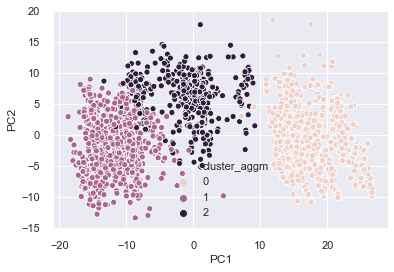

In [72]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=df_PCA['cluster_aggm'])

# Gaussian Mixture

In [50]:
from sklearn.mixture import GaussianMixture

In [51]:
model_1 = GaussianMixture(n_components=3)

In [52]:
model_1 = model_1.fit(X)

In [53]:
data1['cluster_Gaussian'] = model_1.predict(X)

In [54]:
data1['cluster_Gaussian'].value_counts()

2    2836
1    1960
0    1026
Name: cluster_Gaussian, dtype: int64

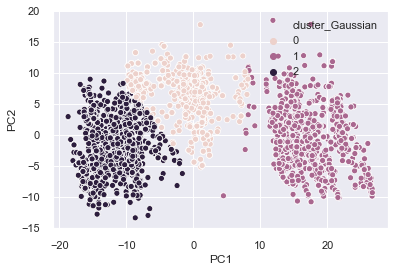

In [55]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=data1['cluster_Gaussian'])

In [56]:
model_2 = model_1.fit(data1.drop('cluster_kmeans', axis=1))

In [58]:
data1['cluster_Gaussian2'] = model_2.predict(data1.drop('cluster_kmeans', axis=1))

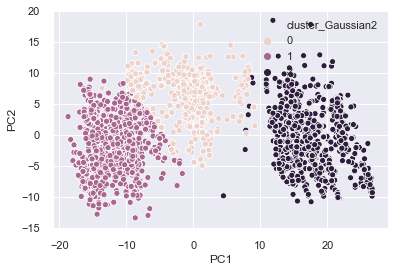

In [59]:
sns.scatterplot(x=df_PCA['PC1'], y=df_PCA['PC2'], hue=data1['cluster_Gaussian2'])

## Conclusion: 
#### - there is no significant different between K means, K means with CPA, Allgomerative cluster and Gaussian Mixtrure
#### - 3 clusters seems better than 2

## Cluster Studying:

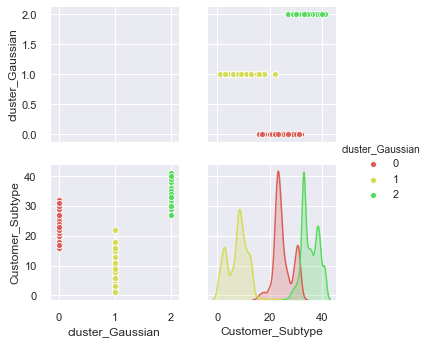

In [75]:
#plt.figure(figsize=(20,20))
sns.pairplot(data1[['cluster_Gaussian', 'Customer_Subtype']], hue='cluster_Gaussian')

# We see below clear separation of cluster based on the customer_Subtype

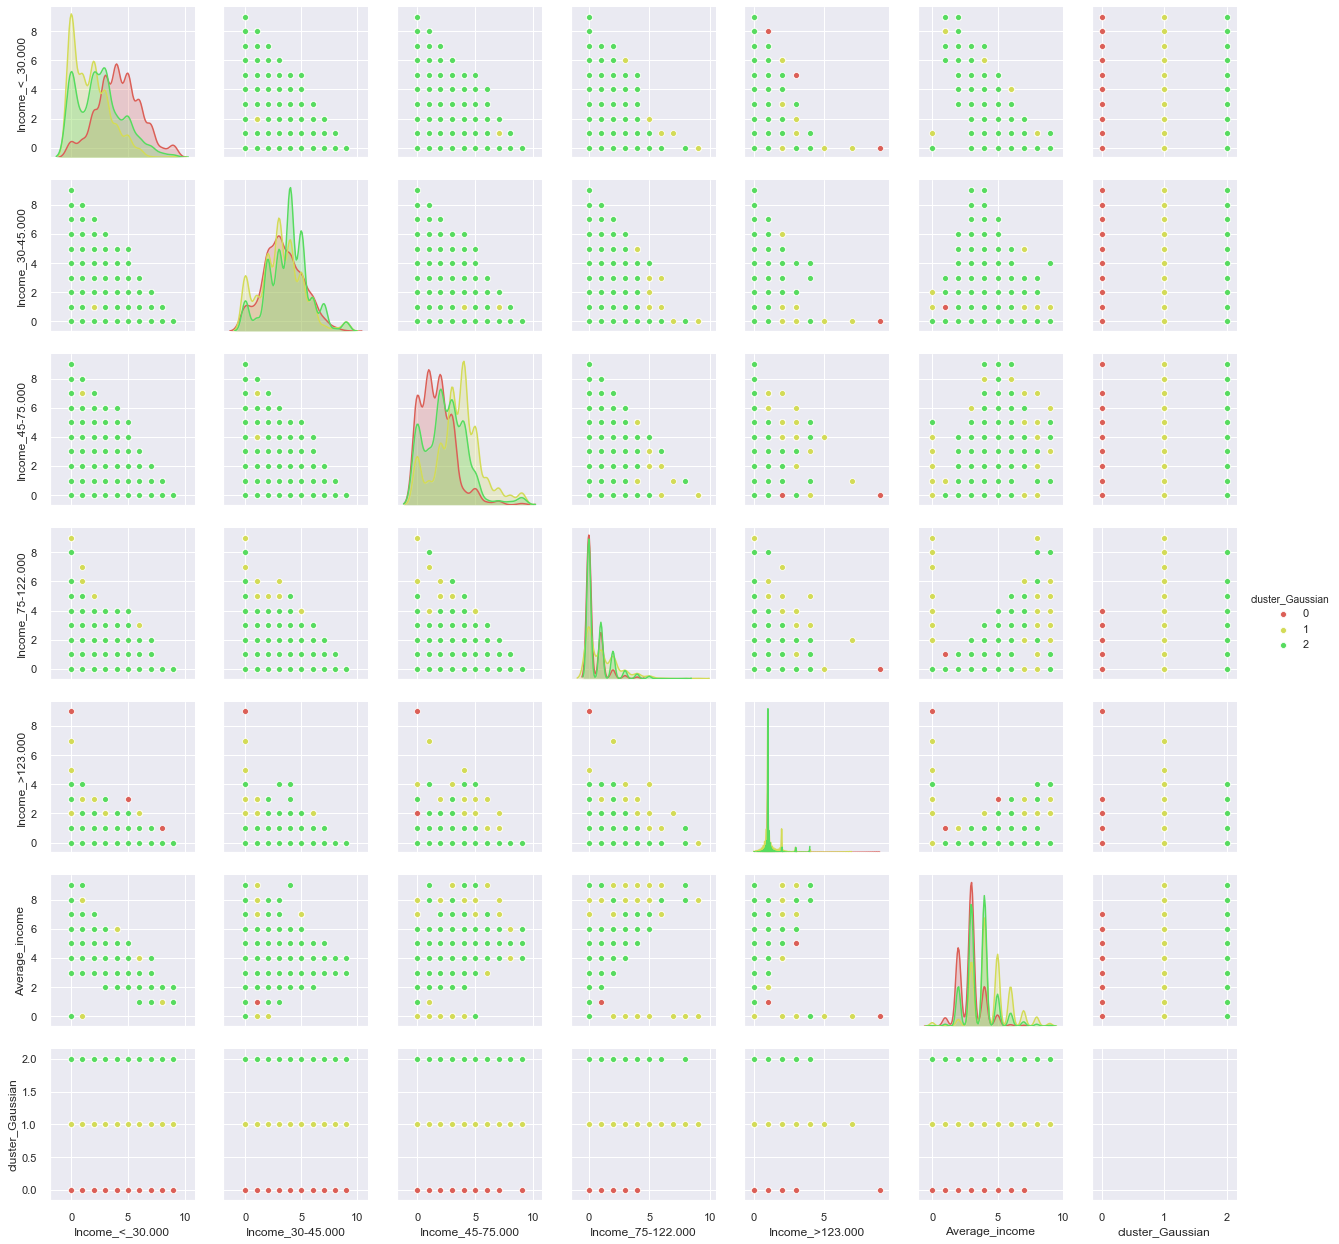

In [76]:
sns.pairplot(data1[['Income_<_30.000', 'Income_30-45.000', 'Income_45-75.000', 'Income_75-122.000', 
                    'Income_>123.000', 'Average_income','cluster_Gaussian']], hue='cluster_Gaussian')

# There is no clear separation in terms of income between clusters

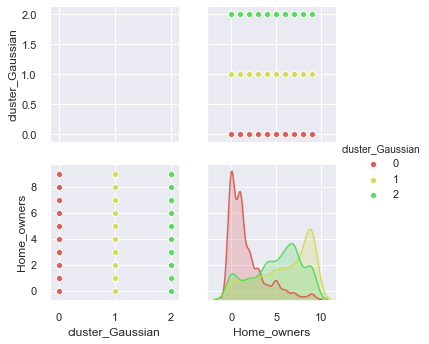

In [77]:
sns.pairplot(data1[['cluster_Gaussian', 'Home_owners']], hue='cluster_Gaussian')
# Again, no clear different between clusters

In [108]:
## Now we are going to study the customer subtypes within clusters
data2 = data1.copy()

In [109]:
Customer_type = {1: 'High Income, expensive child',
2: 'Very Important Provincials',
3: 'High status seniors',
4: 'Affluent senior apartments',
5: 'Mixed seniors',
6: 'Career and childcare',
7: "Dinki's (double income no kids)",
8: 'Middle class families',
9: 'Modern, complete families',
10: 'Stable family',
11: 'Family starters',
12: 'Affluent young families',
13: 'Young all american family',
14: 'Junior cosmopolitan',
15: 'Senior cosmopolitans',
16: 'Students in apartments',
17: 'Fresh masters in the city',
18: 'Single youth',
19: 'Suburban youth',
20: 'Etnically diverse',
21: 'Young urban have-nots',
22: 'Mixed apartment dwellers',
23: 'Young and rising',
24: 'Young, low educated',
25: 'Young seniors in the city',
26: 'Own home elderly',
27: 'Seniors in apartments',
28: 'Residential elderly',
29: 'Porchless seniors: no front yard',
30: 'Religious elderly singles',
31: 'Low income catholics',
32: 'Mixed seniors',
33: 'Lower class large families',
34: 'Large family, employed child',
35: 'Village families',
36: "Couples with teens 'Married with children'",
37: 'Mixed small town dwellers',
38: 'Traditional families',
39: 'Large religous families',
40: 'Large family farms',
41: 'Mixed rurals'}

In [110]:
percent = {0: '0%',
1: '1 - 10%',
2: '11 - 23%',
3: '24 - 36%',
4: '37 - 49%',
5: '50 - 62%',
6: '63 - 75%',
7: '76 - 88%',
8: '89 - 99%',
9: '100%'}

In [112]:
data2['Home_owners'] = data2['Home_owners'].map(percent)

In [127]:
data2[['Income_<_30.000', 'Income_30-45.000', 'Income_45-75.000', 'Income_75-122.000', 
                    'Income_>123.000', 'Average_income','Home_owners']] = data2[['Income_<_30.000', 'Income_30-45.000', 'Income_45-75.000', 'Income_75-122.000', 
                    'Income_>123.000', 'Average_income','Home_owners']].apply(lambda x: x.map(percent))

In [100]:
data2['Customer_Subtype'] = data2['Customer_Subtype'].map(Customer_type)

In [122]:
data2['Purchasing_power_class'] = data2['Purchasing_power_class'].map(percent)

#### Customer Subtype and clusters

In [102]:
data2['Customer_Subtype'][data2['cluster_Gaussian']==0].value_counts()

Young and rising                    251
Young, low educated                 180
Low income catholics                116
Mixed apartment dwellers             94
Young seniors in the city            82
Religious elderly singles            70
Own home elderly                     48
Seniors in apartments                46
Porchless seniors: no front yard     35
Etnically diverse                    25
Mixed seniors                        21
Single youth                         16
Young urban have-nots                15
Students in apartments                9
Fresh masters in the city             8
Residential elderly                   7
Suburban youth                        3
Name: Customer_Subtype, dtype: int64

In [103]:
data2['Customer_Subtype'][data2['cluster_Gaussian']==1].value_counts()

Middle class families              339
Modern, complete families          278
High status seniors                249
Young all american family          179
Stable family                      165
Family starters                    153
High Income, expensive child       124
Career and childcare               119
Affluent young families            111
Very Important Provincials          82
Affluent senior apartments          52
Mixed seniors                       45
Dinki's (double income no kids)     44
Students in apartments               7
Senior cosmopolitans                 5
Mixed apartment dwellers             4
Single youth                         3
Fresh masters in the city            1
Name: Customer_Subtype, dtype: int64

In [104]:
data2['Customer_Subtype'][data2['cluster_Gaussian']==2].value_counts()

Lower class large families                    810
Traditional families                          339
Large religous families                       328
Couples with teens 'Married with children'    225
Village families                              214
Mixed rurals                                  205
Large family, employed child                  182
Mixed small town dwellers                     132
Mixed seniors                                 120
Low income catholics                           89
Large family farms                             71
Porchless seniors: no front yard               51
Religious elderly singles                      48
Residential elderly                            18
Seniors in apartments                           4
Name: Customer_Subtype, dtype: int64

#### Home_owners and clusters

In [115]:
data2['Home_owners'][data2['cluster_Gaussian']==0].value_counts()

0%          361
1 - 10%     294
11 - 23%    128
24 - 36%     84
50 - 62%     53
37 - 49%     38
63 - 75%     26
76 - 88%     19
100%         16
89 - 99%      7
Name: Home_owners, dtype: int64

In [118]:
data2['Home_owners'][data2['cluster_Gaussian']==1].value_counts()

100%        587
89 - 99%    229
76 - 88%    189
50 - 62%    180
63 - 75%    174
24 - 36%    138
0%          122
37 - 49%    121
11 - 23%    111
1 - 10%     109
Name: Home_owners, dtype: int64

In [119]:
data2['Home_owners'][data2['cluster_Gaussian']==2].value_counts()

76 - 88%    516
63 - 75%    404
100%        346
37 - 49%    340
50 - 62%    287
0%          277
89 - 99%    192
11 - 23%    187
24 - 36%    160
1 - 10%     127
Name: Home_owners, dtype: int64

In [123]:
data2['Home_owners'][data2['cluster_Gaussian']==2].value_counts()

76 - 88%    516
63 - 75%    404
100%        346
37 - 49%    340
50 - 62%    287
0%          277
89 - 99%    192
11 - 23%    187
24 - 36%    160
1 - 10%     127
Name: Home_owners, dtype: int64

#### Purschaing power and clusters

In [124]:
data2['Purchasing_power_class'][data2['cluster_Gaussian']==0].value_counts()

11 - 23%    378
1 - 10%     337
24 - 36%    287
37 - 49%     14
50 - 62%      9
63 - 75%      1
Name: Purchasing_power_class, dtype: int64

In [125]:
data2['Purchasing_power_class'][data2['cluster_Gaussian']==1].value_counts()

63 - 75%    715
76 - 88%    474
89 - 99%    426
37 - 49%    272
24 - 36%     43
1 - 10%      12
50 - 62%     12
11 - 23%      6
Name: Purchasing_power_class, dtype: int64

In [126]:
data2['Purchasing_power_class'][data2['cluster_Gaussian']==2].value_counts()

24 - 36%    1194
37 - 49%     616
50 - 62%     562
1 - 10%      238
63 - 75%     185
11 - 23%      41
Name: Purchasing_power_class, dtype: int64

#### Income and clusters

data2['Income_<_30.000'][data2['cluster_Gaussian']==0].value_counts()

In [130]:
data2['Income_<_30.000'][data2['cluster_Gaussian']==1].value_counts()

0%          638
11 - 23%    416
1 - 10%     344
24 - 36%    285
37 - 49%    137
50 - 62%     95
63 - 75%     37
100%          4
76 - 88%      3
89 - 99%      1
Name: Income_<_30.000, dtype: int64

In [131]:
data2['Income_<_30.000'][data2['cluster_Gaussian']==2].value_counts()

0%          629
24 - 36%    607
11 - 23%    573
50 - 62%    282
37 - 49%    250
1 - 10%     247
63 - 75%    126
76 - 88%     77
89 - 99%     27
100%         18
Name: Income_<_30.000, dtype: int64

In [133]:
data2['Income_30-45.000'][data2['cluster_Gaussian']==0].value_counts()

24 - 36%    240
11 - 23%    205
37 - 49%    188
50 - 62%    140
63 - 75%     87
0%           68
1 - 10%      58
76 - 88%     30
89 - 99%      9
100%          1
Name: Income_30-45.000, dtype: int64

In [134]:
data2['Income_30-45.000'][data2['cluster_Gaussian']==1].value_counts()

24 - 36%    461
37 - 49%    370
11 - 23%    313
50 - 62%    237
0%          228
1 - 10%     141
63 - 75%    137
100%         38
76 - 88%     22
89 - 99%     13
Name: Income_30-45.000, dtype: int64

In [135]:
data2['Income_30-45.000'][data2['cluster_Gaussian']==2].value_counts()

37 - 49%    798
50 - 62%    554
24 - 36%    446
11 - 23%    401
63 - 75%    182
0%          169
76 - 88%    153
1 - 10%      69
100%         51
89 - 99%     13
Name: Income_30-45.000, dtype: int64

In [139]:
data2['Income_45-75.000'][data2['cluster_Gaussian']==0].value_counts()

1 - 10%     274
11 - 23%    266
0%          226
24 - 36%    184
50 - 62%     34
37 - 49%     26
76 - 88%      8
63 - 75%      5
100%          3
Name: Income_45-75.000, dtype: int64

In [140]:
data2['Income_45-75.000'][data2['cluster_Gaussian']==1].value_counts()

37 - 49%    526
24 - 36%    430
50 - 62%    283
11 - 23%    222
0%          179
63 - 75%     96
1 - 10%      84
76 - 88%     61
100%         44
89 - 99%     35
Name: Income_45-75.000, dtype: int64

In [141]:
data2['Income_45-75.000'][data2['cluster_Gaussian']==2].value_counts()

11 - 23%    677
24 - 36%    601
0%          486
37 - 49%    482
1 - 10%     299
50 - 62%    181
100%         44
63 - 75%     24
76 - 88%     24
89 - 99%     18
Name: Income_45-75.000, dtype: int64

### It is clear that: 
####  - Cluster 0: Young & old, single and low in come people, most of them does not own a house
#### - Cluster 1: middle class with good income, many own a house
#### - Cluster 2: Big famliy, low income, often own a house since this groups contains families in the rural area